# Import packages

In [53]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
import matplotlib.style as style
import seaborn as sns

# Load Dataset

In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop('Id',1)
train.columns
test = test.drop('Id',1)

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Clean Dataset
   Modify NAs if needed according to the data description

In [4]:
df.Alley = df.Alley.fillna('NoAlley')
df.BsmtQual = df.BsmtQual.fillna("NoBase")
df.BsmtCond = df.BsmtCond.fillna("NoBase")
df.BsmtExposure = df.BsmtExposure.fillna("NoBase")
df.BsmtFinType1 = df.BsmtFinType1.fillna("NoBase")
df.BsmtFinType2 = df.BsmtFinType2.fillna("NoBase")
df.FireplaceQu = df.FireplaceQu.fillna("NoFire")
df.GarageType = df.GarageType.fillna("NoGar")
df.GarageFinish = df.GarageFinish.fillna("NoGar")
df.GarageQual = df.GarageQual.fillna("NoGar")
df.GarageCond = df.GarageCond.fillna("NoGar")
df.PoolQC = df.PoolQC.fillna("NoPool")
df.Fence = df.Fence.fillna("NoFen")
df.MiscFeature = df.MiscFeature.fillna("NoMF")
df.LotFrontage = df.LotFrontage.fillna(0)
df.MasVnrArea = df.MasVnrArea.fillna(0)

# Make Binary variable values 0 and 1 

In [5]:
#binary categorical variables are 'Street','CentralAir'

df['Street'] = df['Street'].replace(['Pave'],0)
df['Street'] = df['Street'].replace(['Grvl'],1)

df['CentralAir'] = df['CentralAir'].replace(["Y"], 1)
df['CentralAir'] = df['CentralAir'].replace(["N"], 0)


# Create pickle of df

In [6]:
with open('cleaned_df.pkl', 'wb') as f:
    pickle.dump(df, f)

# feature engineering


In [14]:
total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [17]:
total = test.isnull().sum().sort_values(ascending = False)[test.isnull().sum().sort_values(ascending = False) != 0]
percent = round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
PoolQC,1456,99.73
MiscFeature,1408,96.44
Alley,1352,92.60
Fence,1169,80.07
FireplaceQu,730,50.00
LotFrontage,227,15.55
GarageYrBlt,78,5.34
GarageFinish,78,5.34
GarageQual,78,5.34
GarageCond,78,5.34


In [29]:
# We first impute the variables in which none is imputed in both the training and testing sets.
features_impute = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageYrBlt', 'GarageType', 'GarageQual', 'GarageFinish', 
                   'GarageCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond']

for feature in features_impute:
    train[feature] = train[feature].replace(np.nan, 'None') 
    test[feature] = test[feature].replace(np.nan, 'None') 

# We now impute PoolQC
train['PoolQC'] = train['PoolQC'].replace(np.nan, 0) 
test['PoolQC'] = test['PoolQC'].replace(np.nan, 0) 

# We now impute the features for which an imputation method was used:
# LotFrontage

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for i in range(0, test.shape[0]):
    if test['Neighborhood'].iloc[i] in list(train['Neighborhood'].unique()):
        test['LotFrontage'].iloc[i] = train.groupby('Neighborhood')['LotFrontage'].median()[test['Neighborhood'].iloc[i]]
    else:
        test['LotFrontage'].iloc[i] = train['LotFrontage'].median()

# MasVnrArea
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(train['MasVnrArea'].median())

# MasVnrType
train['MasVnrType'] = train['MasVnrType'].apply(lambda x: str(x))
train['MasVnrType'] = train['MasVnrType'].apply(lambda x: train['MasVnrType'].mode() if x == 'nan' else x)

test['MasVnrType'] = test['MasVnrType'].apply(lambda x: str(x))
test['MasVnrType'] = test['MasVnrType'].apply(lambda x: train['MasVnrType'].mode() if x == 'nan' else x)

# Electrical(only missing value is in the testing set)
train['Electrical'] = train['Electrical'].apply(lambda x: str(x))
train['Electrical'] = train['Electrical'].apply(lambda x: train['Electrical'].mode() if x == 'nan' else x)

test['Electrical'] = test['Electrical'].apply(lambda x: str(x))
test['Electrical'] = test['Electrical'].apply(lambda x: train['Electrical'].mode() if x == 'nan' else x)

# CHECK IF THIS WAS DONE PROPERLY OR IF THIS MEDIANS AND MODES SHOULD HAVE BEEN LEARNED IN THE TRAINING DATAFRAME.


# Check if there are still missing values:

# Total number of missing values in the training dataframe
print('The number of missing values in the training set is {}.'.format(train.isna().sum().sum()))
# Total number of missing values in the training dataframe
print('The number of missing values in the testing set is {}.'.format(test.isna().sum().sum()))




The number of missing values in the training set is 0.
The number of missing values in the testing set is 22.


In [21]:
total = test.isnull().sum().sort_values(ascending = False)[test.isnull().sum().sort_values(ascending = False) != 0]
percent = round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
MSZoning,4,0.27
BsmtFullBath,2,0.14
BsmtHalfBath,2,0.14
Utilities,2,0.14
Functional,2,0.14
BsmtFinSF1,1,0.07
KitchenQual,1,0.07
Exterior1st,1,0.07
GarageCars,1,0.07
GarageArea,1,0.07


In [30]:
from scipy.stats import pearsonr
print(pearsonr(train['GarageCars'], train['GarageArea']))
print(pearsonr(train['GrLivArea'], train['TotRmsAbvGrd']))
print(pearsonr(train['TotalBsmtSF'], train['1stFlrSF']))
print(pearsonr(train['GrLivArea'], train['TotRmsAbvGrd']))

(0.8824754142814621, 0.0)
(0.825489374308843, 0.0)
(0.8195299750050331, 0.0)
(0.825489374308843, 0.0)


# TotalSF: this new feature is created by adding up other variables that add up to the total square footage of each house/observation.


In [32]:
# Training set
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Test set
test['TotalSF']= test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Total bathrooms: this new feature includes the number of bathrooms in the house/observation.


In [33]:
# Training set
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

# Test set
test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

# Total_porch_sf: new feature that includes the total square footage of the porch in each house/observation.


In [34]:
# Training set
train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] +train['ScreenPorch'] +
                              train['WoodDeckSF'])

# Test set
test['Total_porch_sf'] = (test['OpenPorchSF'] + test['3SsnPorch'] +
                              test['EnclosedPorch'] + test['ScreenPorch'] +
                              test['WoodDeckSF'])


In [35]:
#YrBltAndRemod: this variable adds the year the house was remodeled to the house it was built.

train['YrBltAndRemod'] = train['YearBuilt'] +train['YearRemodAdd']
test['YrBltAndRemod'] = test['YearBuilt'] + test['YearRemodAdd']



We create a series of dummy features that gathers information on whether any of the following are present in the house:
1. haspool: whether there is a pool.
2. has2ndfloor: whether there is a second floor.
3. hasgarage: whether there is a garage.
4. hasbsmt: whether there is a basement.
5. hasfireplace: whether there is a fireplace.

In [37]:
# Training set
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] =train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# Test set
test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

We now drop the variable out of which the new featues were created.


In [38]:
# Training set
train.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 
                        'ScreenPorch', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'PoolArea', '2ndFlrSF',
                       'GarageArea', 'Fireplaces', 'BedroomAbvGr'], inplace = True)

# Test set
test.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 
                        'ScreenPorch', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'PoolArea', '2ndFlrSF',
                       'GarageArea', 'Fireplaces', 'BedroomAbvGr'], inplace = True)


In [70]:
corr_df["SalePrice"] = train["SalePrice"]
corr_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,KitchenAbvGr,...,TotalSF,Total_Bathrooms,Total_porch_sf,YrBltAndRemod,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,SalePrice
0,60,65.0,8450,7,5,196.0,150,0,1710,1,...,2566,3.5,61,4006,0,1,1,1,0,208500
1,20,80.0,9600,6,8,0.0,284,0,1262,1,...,2524,2.5,298,3952,0,0,1,1,1,181500
2,60,68.0,11250,7,5,162.0,434,0,1786,1,...,2706,3.5,42,4003,0,1,1,1,1,223500
3,70,60.0,9550,7,5,0.0,540,0,1717,1,...,2473,2.0,307,3885,0,1,1,1,1,140000
4,60,84.0,14260,8,5,350.0,490,0,2198,1,...,3343,3.5,276,4000,0,1,1,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,953,0,1647,1,...,2600,2.5,40,3999,0,1,1,1,1,175000
1456,20,85.0,13175,6,6,119.0,589,0,2073,1,...,3615,3.0,349,3966,0,0,1,1,1,210000
1457,70,66.0,9042,7,9,0.0,877,0,2340,1,...,3492,2.0,60,3947,0,1,1,1,1,266500
1458,20,68.0,9717,5,6,0.0,0,0,1078,1,...,2156,2.0,478,3946,0,0,1,1,0,142125


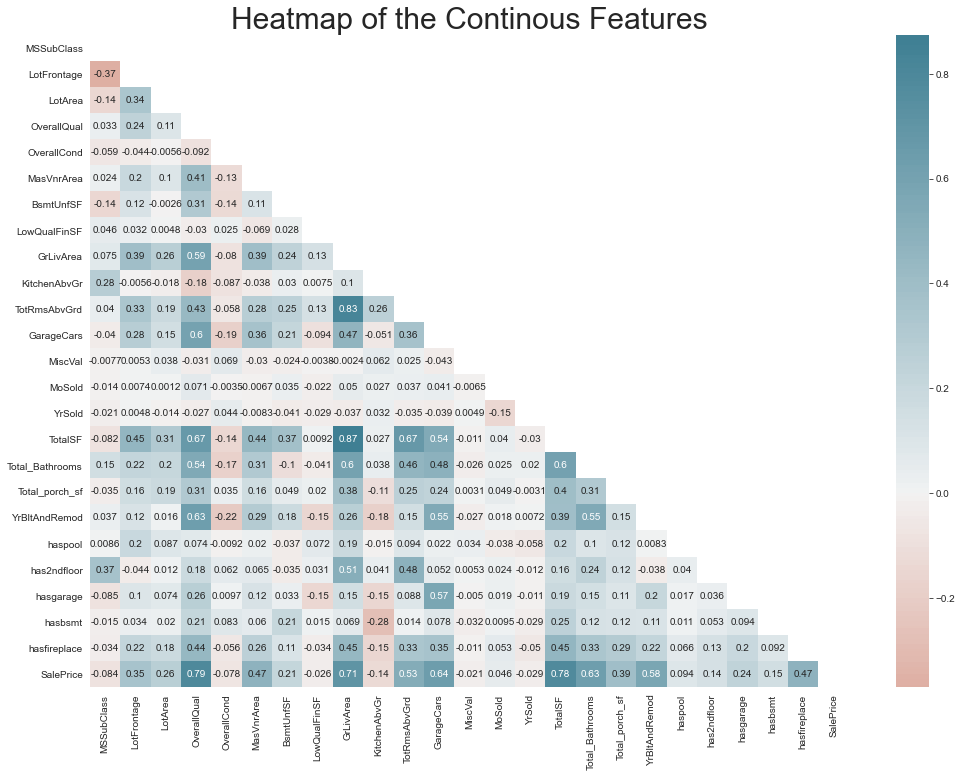

In [75]:
corr_df = train[list(train.select_dtypes(['number']).columns)].drop("SalePrice",1)
corr_df["SalePrice"] = train["SalePrice"]
corr_df = corr_df.corr()
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (17,12))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr_df, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0,
           );
## Give title. 
plt.title("Heatmap of the Continous Features", fontsize = 30);